# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
# from torchvision import transforms
# from torchvision import datasets

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize([0.5],[0.5])])

# Create training set and define training dataloader
## YOUR CODE HERE ##
trainset = torchvision.datasets.MNIST(root='data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
testset = torchvision.datasets.MNIST(root='data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

1)Used ToTensor tranformations to convert each image in form of a tensor so that it can be passed to and processed by a model

2)Used Normalise tranforms to standardise the variables around zero mean to avoid data variations

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

1


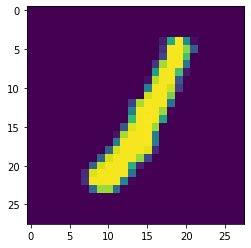

3


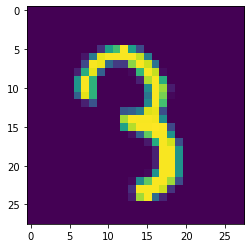

0


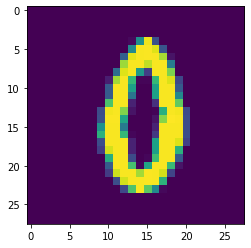

5


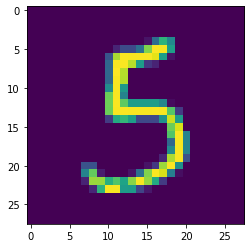

2


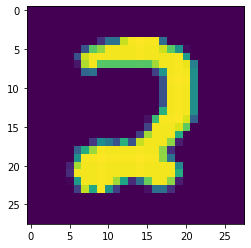

In [4]:
# Explore data
## YOUR CODE HERE ##
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
## YOUR CODE HERE ##
model = nn.Sequential(nn.Linear(28*28,512),
                     nn.Sigmoid(),
                     nn.Linear(512,128),
                     nn.Sigmoid(),
                     nn.Linear(128,64),
                     nn.Sigmoid(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim = 1))

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
## YOUR CODE HERE ##
optimiser = optim.Adam(model.parameters(), lr=0.00032)

criterion = nn.NLLLoss()
#used Negative Log likelihood loss as logits(log of softmax) is returned as output

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
## YOUR CODE HERE ##
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epochs=4
train_loss_history=[]
test_loss_history=[]

for i in range(epochs):
    training_loss = 0
    running_loss = 0
    model.to(device)
    model.train()
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        images, labels = images.to(device), labels.to(device)
        
        optimiser.zero_grad()
        output = model(images)
        
        loss = criterion(output, labels)
        loss.backward()
        optimiser.step()
        
        training_loss += loss.item()
    
    print(f"Epoch {i+1}/{epochs}:-"
          f"Training loss {training_loss/len(trainloader):.3f}")
    
    train_loss_history.append(training_loss/len(trainloader))
    
    model.eval()
    with torch.no_grad():    
        for images, labels in testloader:
            images = images.view(images.shape[0],-1)
            images, labels = images.to(device), labels.to(device)
            
            output = model(images)
            rloss = criterion(output, labels)
            
            running_loss += rloss.item()
            
        print(f"Epoch {i+1}/{epochs}:-"
          f"Running loss {running_loss/len(testloader):.3f}")
        
        test_loss_history.append(running_loss/len(testloader))  
    model.train()

Epoch 1/4:-Training loss 0.104
Epoch 1/4:-Running loss 0.116
Epoch 2/4:-Training loss 0.085
Epoch 2/4:-Running loss 0.100
Epoch 3/4:-Training loss 0.071
Epoch 3/4:-Running loss 0.083
Epoch 4/4:-Training loss 0.060
Epoch 4/4:-Running loss 0.076


Plot the training loss (and validation loss/accuracy, if recorded).

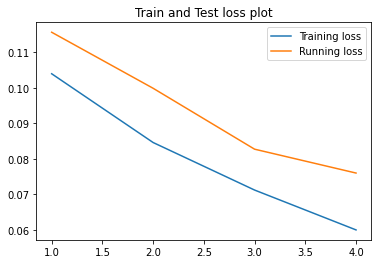

In [10]:
## YOUR CODE HERE ##
import matplotlib.pyplot as plt
%matplotlib inline 

l = [1,2,3,4]

plt.plot(l, train_loss_history, label = "Training loss")
plt.plot(l, test_loss_history, label = "Running loss")
plt.title("Train and Test loss plot")
plt.legend()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
## YOUR CODE HERE ##
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

accuracy = 0
for images, labels in testloader:
    images = images.view(images.shape[0],-1)
    images, labels = images.to(device), labels.to(device)
        
    outputs = model(images)
    top_prob, top_class = outputs.topk(1, dim = 1)
    equals = top_class==labels.view(top_class.shape)
    accuracy += torch.mean(equals.type(torch.FloatTensor))
       
print(f"Model accuracy is {accuracy/len(testloader)*100:.3f}")
model.train()
    

Model accuracy is 97.634


Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=512, out_features=128, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [51]:
## YOUR CODE HERE ##
model = nn.Sequential(nn.Linear(28*28,512),
                     nn.ReLU(),
                     nn.Linear(512,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim = 1))

optimiser = optim.SGD(model.parameters(), lr=0.003)

criterion = nn.NLLLoss()

In [59]:
## YOUR CODE HERE ##
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epochs=20
train_loss_history=[]
test_loss_history=[]

for i in range(epochs):
    training_loss = 0
    running_loss = 0
    model.to(device)
    model.train()
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        images, labels = images.to(device), labels.to(device)
        
        optimiser.zero_grad()
        output = model(images)
        
        loss = criterion(output, labels)
        loss.backward()
        optimiser.step()
        
        training_loss += loss.item()
    
    print(f"Epoch {i+1}/{epochs}:-"
          f"Training loss {training_loss/len(trainloader):.3f}")
    
    train_loss_history.append(training_loss/len(trainloader))
    
    model.eval()
    with torch.no_grad():    
        for images, labels in testloader:
            images = images.view(images.shape[0],-1)
            images, labels = images.to(device), labels.to(device)
            
            output = model(images)
            rloss = criterion(output, labels)
            
            running_loss += rloss.item()
            
        print(f"Epoch {i+1}/{epochs}:-"
          f"Running loss {running_loss/len(testloader):.3f}")
        
        test_loss_history.append(running_loss/len(testloader))  
    model.train()

Epoch 1/20:-Training loss 0.089
Epoch 1/20:-Running loss 0.106
Epoch 2/20:-Training loss 0.085
Epoch 2/20:-Running loss 0.102
Epoch 3/20:-Training loss 0.081
Epoch 3/20:-Running loss 0.100
Epoch 4/20:-Training loss 0.078
Epoch 4/20:-Running loss 0.099
Epoch 5/20:-Training loss 0.074
Epoch 5/20:-Running loss 0.104
Epoch 6/20:-Training loss 0.072
Epoch 6/20:-Running loss 0.096
Epoch 7/20:-Training loss 0.068
Epoch 7/20:-Running loss 0.093
Epoch 8/20:-Training loss 0.065
Epoch 8/20:-Running loss 0.091
Epoch 9/20:-Training loss 0.063
Epoch 9/20:-Running loss 0.091
Epoch 10/20:-Training loss 0.060
Epoch 10/20:-Running loss 0.090
Epoch 11/20:-Training loss 0.058
Epoch 11/20:-Running loss 0.088
Epoch 12/20:-Training loss 0.055
Epoch 12/20:-Running loss 0.089
Epoch 13/20:-Training loss 0.053
Epoch 13/20:-Running loss 0.085
Epoch 14/20:-Training loss 0.051
Epoch 14/20:-Running loss 0.085
Epoch 15/20:-Training loss 0.049
Epoch 15/20:-Running loss 0.082
Epoch 16/20:-Training loss 0.047
Epoch 16/2

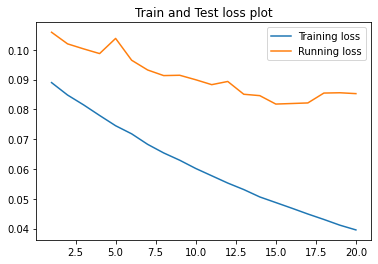

In [60]:
l = [i+1 for i in range(20)]

plt.plot(l, train_loss_history, label = "Training loss")
plt.plot(l, test_loss_history, label = "Running loss")
plt.title("Train and Test loss plot")
plt.legend()

In [61]:
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

accuracy = 0
for images, labels in testloader:
    images = images.view(images.shape[0],-1)
    images, labels = images.to(device), labels.to(device)
        
    outputs = model(images)
    top_prob, top_class = outputs.topk(1, dim = 1)
    equals = top_class==labels.view(top_class.shape)
    accuracy += torch.mean(equals.type(torch.FloatTensor))
       
print(f"Model accuracy is {accuracy/len(testloader)*100:.3f}")
model.train()

Model accuracy is 97.464


Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)

## Saving your model
Using `torch.save`, save your model for future loading.

In [18]:
## YOUR CODE HERE ##
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [512, 128, 64],
              'state_dict': model.state_dict(),
               'epochs': 4,}

torch.save(checkpoint, 'checkpoint.pth')